In [1]:
import numpy as np
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import copy
import h5py
import numpy as np
import matplotlib
import re

import matplotlib.pyplot as plt
from dedalus.extras import plot_tools

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

import os
from os import listdir

In [2]:
Lx, Ly, Lz = 12,12,1
Nx, Ny, Nz = 384, 384, 32

Ra_M = 1.0e6

Prandtl = 1.0

D_0 = 0
D_H = [i/24 for i in range(-4, 9)]
M_0 = 0
M_H = -1

print(D_H)

N_s2 = [dh - M_H + 0.001 for dh in D_H]

Ra_D = [Ra_M * (D_0-dh) / (M_0-M_H) for dh in D_H]

dealias = 3/2
stop_sim_time = 2000
timestepper = d3.RK222
max_timestep = 0.125
dtype = np.float64



nu = [(Ra_M / (Prandtl*(M_0-M_H)*Lz**3))**(-1/2) for ind in range(len(D_H))]




print(type(nu))
print(nu)
nu = 0.001

[-0.16666666666666666, -0.125, -0.08333333333333333, -0.041666666666666664, 0.0, 0.041666666666666664, 0.08333333333333333, 0.125, 0.16666666666666666, 0.20833333333333334, 0.25, 0.2916666666666667, 0.3333333333333333]
<class 'list'>
[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]


In [3]:
all_filepaths = []
names = ["n4", 'n3', 'n2', 'n1','00', 'p1','p2','p3','p4','p5','p6','p7','p8']
all_dhs = [-4,-3,-2,-1, 0, 1,2,3,4,5,6,7,8]
all_dhlabels = ["-1/6","-1/8", "-1/12", "-1/24", "0", "1/24", "1/12", "1/8", "1/6", "5/24", "1/4", "7/24", "1/3"]
for name in names:
    folder_dir = f"analysis_{name}o24"

    file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
    #sort by the number in the file name
    file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
    print(file_paths)
    all_filepaths.append(file_paths)
print(all_filepaths)

['analysis_n4o24/analysis_n4o24_s1.h5', 'analysis_n4o24/analysis_n4o24_s2.h5']
['analysis_n3o24/analysis_n3o24_s1.h5', 'analysis_n3o24/analysis_n3o24_s2.h5']
['analysis_n2o24/analysis_n2o24_s1.h5', 'analysis_n2o24/analysis_n2o24_s2.h5']
['analysis_n1o24/analysis_n1o24_s1.h5', 'analysis_n1o24/analysis_n1o24_s2.h5']
['analysis_00o24/analysis_00o24_s1.h5', 'analysis_00o24/analysis_00o24_s2.h5']
['analysis_p1o24/analysis_p1o24_s1.h5', 'analysis_p1o24/analysis_p1o24_s2.h5']
['analysis_p2o24/analysis_p2o24_s1.h5', 'analysis_p2o24/analysis_p2o24_s2.h5']
['analysis_p3o24/analysis_p3o24_s1.h5', 'analysis_p3o24/analysis_p3o24_s2.h5']
['analysis_p4o24/analysis_p4o24_s1.h5', 'analysis_p4o24/analysis_p4o24_s2.h5']
['analysis_p5o24/analysis_p5o24_s1.h5', 'analysis_p5o24/analysis_p5o24_s2.h5']
['analysis_p6o24/analysis_p6o24_s1.h5', 'analysis_p6o24/analysis_p6o24_s2.h5']
['analysis_p7o24/analysis_p7o24_s1.h5', 'analysis_p7o24/analysis_p7o24_s2.h5']
['analysis_p8o24/analysis_p8o24_s1.h5', 'analysis_p8

/state/partition1/job-46153802/ipykernel_2931547/860780606.py:17: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis, np.log(all_tot_ke)+3*ind, label = f"$D_H={all_dhlabels[-ind-1]}$")


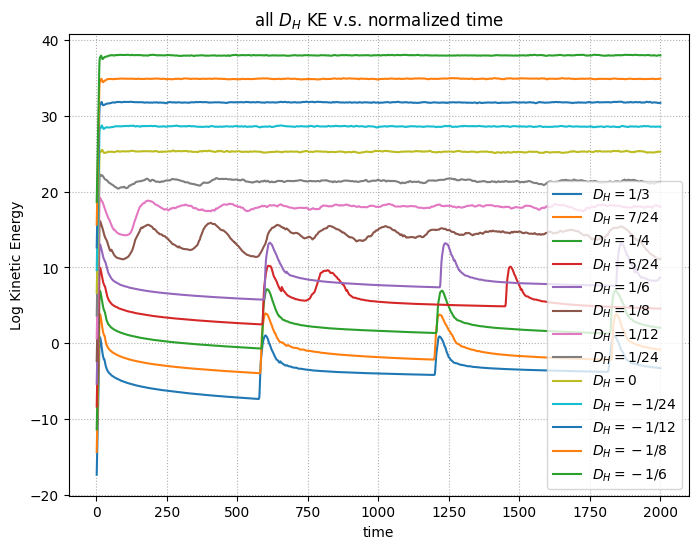

/state/partition1/job-46153802/ipykernel_2931547/860780606.py:38: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis[:1000], np.log(all_tot_ke)[:1000]+3*ind, label = f"$D_H={all_dhlabels[-ind-1]}$")


<Figure size 640x480 with 0 Axes>

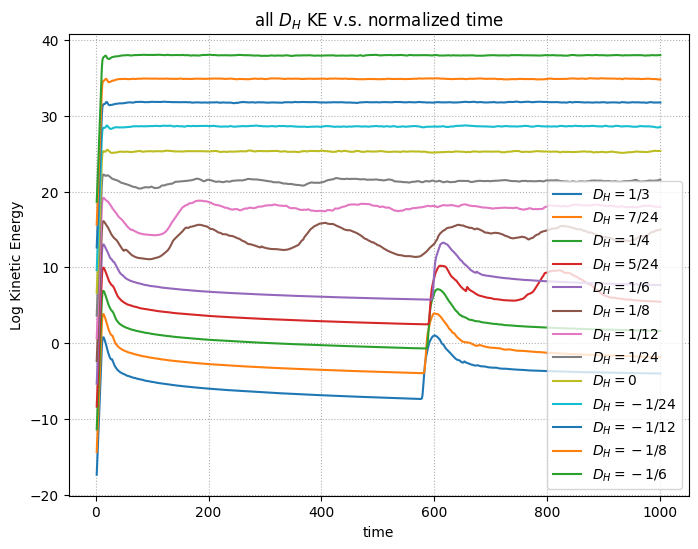

/state/partition1/job-46153802/ipykernel_2931547/860780606.py:61: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis[:1000], np.log(all_tot_ke)[:1000]+3*ind, label = f"$D_H={all_dhs[-ind-1]}/24$")


<Figure size 640x480 with 0 Axes>

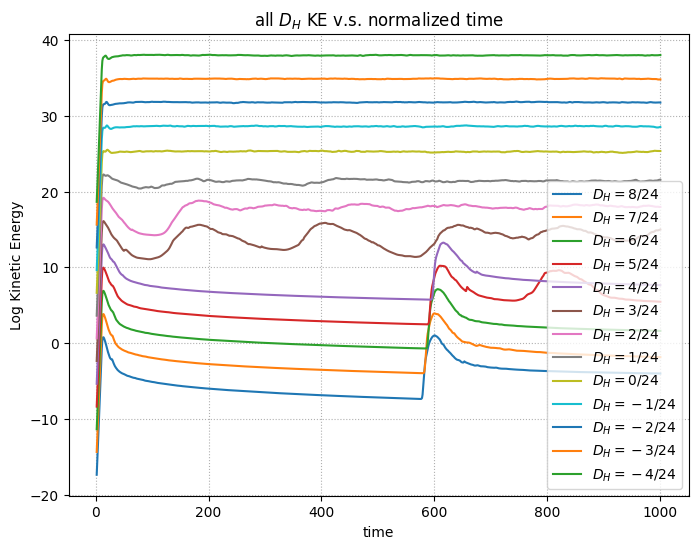

<Figure size 640x480 with 0 Axes>

In [4]:
plt.figure(figsize=(8, 6))
plt.grid(linestyle="dotted")
plt.title(f'all $D_H$ KE v.s. normalized time')
plt.xlabel('time')
plt.ylabel('Log Kinetic Energy')
for ind in range(len(all_filepaths)):
    each_path = all_filepaths[-ind-1]
    all_tot_ke = []
    for file in each_path:
        with h5py.File(file, mode='r') as file:
            tot_ke = file['tasks']['total kinetic energy']
            st = file['scales/sim_time']
            simtime = np.array(st)
            for t in range(0, len(simtime)):
                all_tot_ke.append(np.sum(tot_ke[t]))
    figure_x_axis = np.array([x for x in range(1, len(all_tot_ke)+1)])
    plt.plot(figure_x_axis, np.log(all_tot_ke)+3*ind, label = f"$D_H={all_dhlabels[-ind-1]}$")
plt.legend(loc="lower right")
plt.show()
plt.clf()

plt.figure(figsize=(8, 6))
plt.grid(linestyle="dotted")
plt.title(f'all $D_H$ KE v.s. normalized time')
plt.xlabel('time')
plt.ylabel('Log Kinetic Energy')
for ind in range(len(all_filepaths)):
    each_path = all_filepaths[-ind-1]
    all_tot_ke = []
    for file in each_path:
        with h5py.File(file, mode='r') as file:
            tot_ke = file['tasks']['total kinetic energy']
            st = file['scales/sim_time']
            simtime = np.array(st)
            for t in range(0, len(simtime)):
                all_tot_ke.append(np.sum(tot_ke[t]))
    figure_x_axis = np.array([x for x in range(1, len(all_tot_ke)+1)])
    plt.plot(figure_x_axis[:1000], np.log(all_tot_ke)[:1000]+3*ind, label = f"$D_H={all_dhlabels[-ind-1]}$")
plt.legend(loc="lower right")
plt.savefig("allDH_zoomin")
plt.show()
plt.clf()


plt.figure(figsize=(8, 6))
plt.grid(linestyle="dotted")
plt.title(f'all $D_H$ KE v.s. normalized time')
plt.xlabel('time')
plt.ylabel('Log Kinetic Energy')
for ind in range(len(all_filepaths)):
    each_path = all_filepaths[-ind-1]
    all_tot_ke = []
    for file in each_path:
        with h5py.File(file, mode='r') as file:
            tot_ke = file['tasks']['total kinetic energy']
            st = file['scales/sim_time']
            simtime = np.array(st)
            for t in range(0, len(simtime)):
                all_tot_ke.append(np.sum(tot_ke[t]))
    figure_x_axis = np.array([x for x in range(1, len(all_tot_ke)+1)])
    plt.plot(figure_x_axis[:1000], np.log(all_tot_ke)[:1000]+3*ind, label = f"$D_H={all_dhs[-ind-1]}/24$")
plt.legend(loc="lower right")
plt.savefig("allDH_zoomin_2")
plt.show()
plt.clf()

/state/partition1/job-46153802/ipykernel_2931547/670696853.py:28: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis, np.log(all_tot_ke)+3*ind, label = f"$D_H={all_dhlabels[-ind-1]}$")


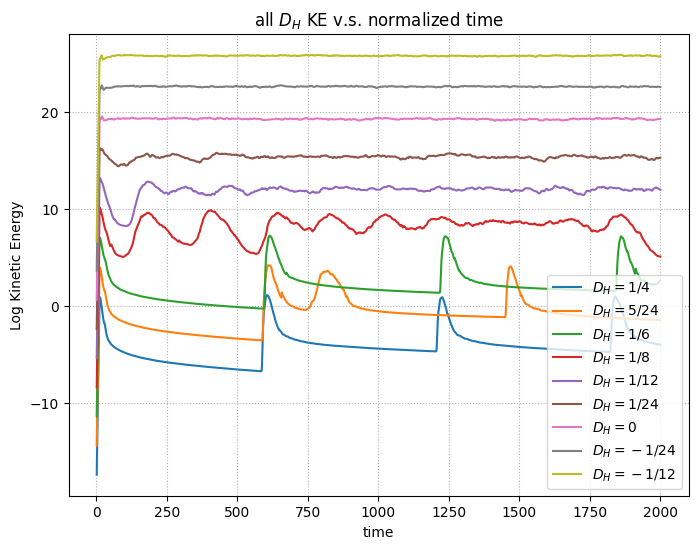

<Figure size 640x480 with 0 Axes>

In [5]:
all_filepaths = []
names = [ 'n2', 'n1','00', 'p1','p2','p3','p4','p5','p6']
all_dhs = [-2,-1, 0, 1,2,3,4,5,6]
all_dhlabels = [ "-1/12", "-1/24", "0", "1/24", "1/12", "1/8", "1/6", "5/24", "1/4"]
for name in names:
    folder_dir = f"analysis_{name}o24"
    file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
    #sort by the number in the file name
    file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
    all_filepaths.append(file_paths)

plt.figure(figsize=(8, 6))
plt.grid(linestyle="dotted")
plt.title(f'all $D_H$ KE v.s. normalized time')
plt.xlabel('time')
plt.ylabel('Log Kinetic Energy')
for ind in range(len(all_filepaths)):
    each_path = all_filepaths[-ind-1]
    all_tot_ke = []
    for file in each_path:
        with h5py.File(file, mode='r') as file:
            tot_ke = file['tasks']['total kinetic energy']
            st = file['scales/sim_time']
            simtime = np.array(st)
            for t in range(0, len(simtime)):
                all_tot_ke.append(np.sum(tot_ke[t]))
    figure_x_axis = np.array([x for x in range(1, len(all_tot_ke)+1)])
    plt.plot(figure_x_axis, np.log(all_tot_ke)+3*ind, label = f"$D_H={all_dhlabels[-ind-1]}$")
plt.legend(loc="lower right")
plt.show()
plt.clf()

In [15]:
selected_filepaths = []
#sel_names = ['00','p3','p6']
#dhs = [ 0,3,6]
#sel_names = ["n4", 'n2','00', 'p2','p4','p6','p8']
#dhs = [-4,-2, 0, 2,4,6,8]
sel_names = [ 'n1','00', 'p1','p2','p3','p4','p6']
dhs = [-1, 0, 1,2,3,4,6]
for name in sel_names:
    folder_dir = f"analysis_{name}o24"
    file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
    #sort by the number in the file name
    file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
    print(file_paths)
    selected_filepaths.append(file_paths)
print(selected_filepaths)

['analysis_n1o24/analysis_n1o24_s1.h5', 'analysis_n1o24/analysis_n1o24_s2.h5']
['analysis_00o24/analysis_00o24_s1.h5', 'analysis_00o24/analysis_00o24_s2.h5']
['analysis_p1o24/analysis_p1o24_s1.h5', 'analysis_p1o24/analysis_p1o24_s2.h5']
['analysis_p2o24/analysis_p2o24_s1.h5', 'analysis_p2o24/analysis_p2o24_s2.h5']
['analysis_p3o24/analysis_p3o24_s1.h5', 'analysis_p3o24/analysis_p3o24_s2.h5']
['analysis_p4o24/analysis_p4o24_s1.h5', 'analysis_p4o24/analysis_p4o24_s2.h5']
['analysis_p6o24/analysis_p6o24_s1.h5', 'analysis_p6o24/analysis_p6o24_s2.h5']
[['analysis_n1o24/analysis_n1o24_s1.h5', 'analysis_n1o24/analysis_n1o24_s2.h5'], ['analysis_00o24/analysis_00o24_s1.h5', 'analysis_00o24/analysis_00o24_s2.h5'], ['analysis_p1o24/analysis_p1o24_s1.h5', 'analysis_p1o24/analysis_p1o24_s2.h5'], ['analysis_p2o24/analysis_p2o24_s1.h5', 'analysis_p2o24/analysis_p2o24_s2.h5'], ['analysis_p3o24/analysis_p3o24_s1.h5', 'analysis_p3o24/analysis_p3o24_s2.h5'], ['analysis_p4o24/analysis_p4o24_s1.h5', 'analy

## 3/24 is oscillation, below it is always convecting, above it is laminar

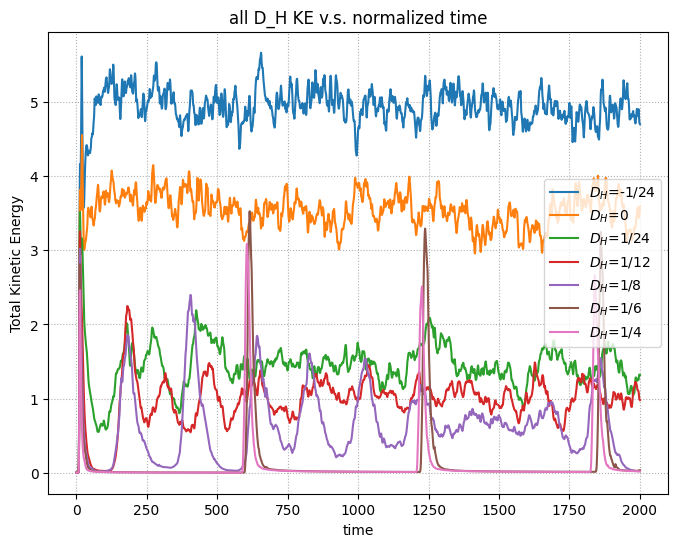

/state/partition1/job-46060812/ipykernel_2379092/2404780263.py:40: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis, np.log(all_tot_ke), label = f"$D_H={dhlabels[ind]}/24$")


<Figure size 640x480 with 0 Axes>

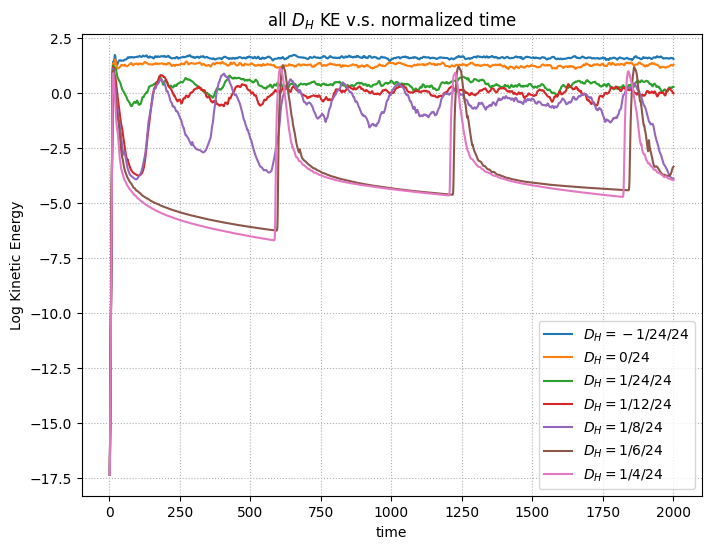

<Figure size 640x480 with 0 Axes>

In [29]:
dhlabels = ["-1/24", "0", "1/24", "1/12", "1/8", "1/6", "1/4"]
plt.figure(figsize=(8, 6))
plt.grid(linestyle="dotted")
plt.title(f'all D_H KE v.s. normalized time')
plt.xlabel('time')
plt.ylabel('Total Kinetic Energy')
for ind in range(len(selected_filepaths)):
    each_path = selected_filepaths[ind]
    all_tot_ke = []
    for file in each_path:
        with h5py.File(file, mode='r') as file:
            tot_ke = file['tasks']['total kinetic energy']
            st = file['scales/sim_time']
            simtime = np.array(st)
            for t in range(0, len(simtime)):
                all_tot_ke.append(np.sum(tot_ke[t]))
    figure_x_axis = np.array([x for x in range(1, len(all_tot_ke)+1)])
    plt.plot(figure_x_axis, all_tot_ke, label = f"$D_H$={dhlabels[ind]}")
plt.legend()
plt.savefig("3dke")
plt.show()
plt.clf()

plt.figure(figsize=(8, 6))
plt.grid(linestyle="dotted")
plt.title(f'all $D_H$ KE v.s. normalized time')
plt.xlabel('time')
plt.ylabel('Log Kinetic Energy')
for ind in range(len(selected_filepaths)):
    each_path = selected_filepaths[ind]
    all_tot_ke = []
    for file in each_path:
        with h5py.File(file, mode='r') as file:
            tot_ke = file['tasks']['total kinetic energy']
            st = file['scales/sim_time']
            simtime = np.array(st)
            for t in range(0, len(simtime)):
                all_tot_ke.append(np.sum(tot_ke[t]))
    figure_x_axis = np.array([x for x in range(1, len(all_tot_ke)+1)])
    plt.plot(figure_x_axis, np.log(all_tot_ke), label = f"$D_H={dhlabels[ind]}/24$")
plt.legend()
plt.savefig("3dlog")
plt.show()
plt.clf()


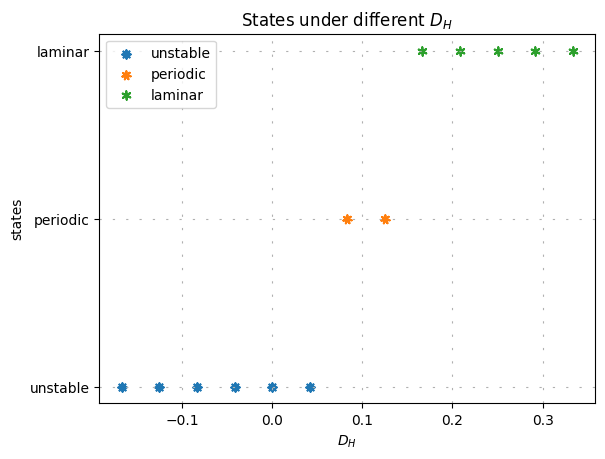

In [6]:
real_DH_1 = np.array([-4,-3,-2,-1, 0, 1])/24
real_DH_2 = np.array([2,3])/24
real_DH_3 = np.array([4,5,6,7,8])/24
states1 = [1,1,1,1,1,1]
states2 = [2, 2]
states3 = [3,3,3,3,3]
plt.scatter(real_DH_1, states1, label = "unstable", marker = (8, 2, 1))
plt.scatter(real_DH_2, states2, label = "periodic", marker = (7,2,2))
plt.scatter(real_DH_3, states3, label = "laminar", marker = (6,2,3))
plt.yticks([1, 2, 3], ['unstable', 'periodic', 'laminar'])
plt.xlabel('$D_H$')
plt.ylabel('states')
plt.grid(linestyle=(0, (2, 10)))
plt.title("States under different $D_H$")
plt.legend()
plt.savefig("states")
plt.show()